In [1]:
import os
import shutil
import numpy as np

from fastai.vision.all import *
from pathlib import Path
from tqdm.auto import tqdm
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

In [2]:
def download_and_unzip(url, extract_to='.'):
  """
  Takes an url to download and unzip the dataset
  """
  http_response = urlopen(url)
  zipfile = ZipFile(BytesIO(http_response.read()))
  zipfile.extractall(path=extract_to)


PROJ_PATH = Path.cwd().parent
DATA_PATH = PROJ_PATH/'data'
print(PROJ_PATH)
print(DATA_PATH)

/
/data


In [3]:
download_and_unzip(url='https://github.com/abin24/Magnetic-tile-defect-datasets./archive/refs/heads/master.zip',
                   extract_to=DATA_PATH)

extract_dir = DATA_PATH/'Magnetic-tile-defect-datasets.-master'

In [4]:
dataset_path = DATA_PATH/'MAGNETIC_TILE_SURFACE_DEFECTS'

if dataset_path.is_dir():
    shutil.rmtree(dataset_path)

if extract_dir.is_dir():
    shutil.move(extract_dir, dataset_path)
dataset_path.ls()


(#9) [Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Uneven'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/dataset.jpg'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Fray'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Blowhole'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/README.md'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Break'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/dataset.png'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Crack'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Free')]

In [5]:
dataset_path.ls()

(#9) [Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Uneven'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/dataset.jpg'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Fray'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Blowhole'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/README.md'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Break'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/dataset.png'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Crack'),Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/MT_Free')]

In [6]:
if (dataset_path/'MT_Free').exists():
    shutil.rmtree(dataset_path/'MT_Free')

In [7]:
classes = []

for ii in (dataset_path).ls():
    if ii.is_dir() and ii.stem.startswith('MT_'):
        classes.append(ii.stem)
classes

['MT_Uneven', 'MT_Fray', 'MT_Blowhole', 'MT_Break', 'MT_Crack']

In [8]:
classes_dict = {c:i+1 for i, c in enumerate(classes)}
classes_dict

{'MT_Uneven': 1, 'MT_Fray': 2, 'MT_Blowhole': 3, 'MT_Break': 4, 'MT_Crack': 5}

In [9]:
img_paths = [get_files(dataset_path/c, extensions='.jpg') for c in classes]
img_paths = [ii for sublist in img_paths for ii in sublist]
len(img_paths)

392

In [10]:
msk_paths = [get_files(dataset_path/c, extensions='.png') for c in classes]
msk_paths = [ii for sublist in msk_paths for ii in sublist]
len(msk_paths)

392

In [11]:
assert len(img_paths) == len(msk_paths)

img_dir_path = dataset_path/'images'
mask_dir_path = dataset_path/'masks'

for p in [img_dir_path, mask_dir_path]:
    p.mkdir(exist_ok=True)

In [12]:
np.random.seed(42)

for img_path, msk_path in tqdm(zip(img_paths, msk_paths), total=len(img_paths)):
    c = msk_path.parent.parent.stem
    msk = np.array(Image.open(msk_path))
    msk[msk>0] = 1 # binary segmenation: defect/defect-free

    new_img_path = img_dir_path/img_path.name
    new_mask_path = mask_dir_path/msk_path.name
    shutil.copyfile(img_path, new_img_path)
    Image.fromarray(msk).save(new_mask_path)

  0%|          | 0/392 [00:00<?, ?it/s]

In [13]:
assert len(get_files(img_dir_path, extensions='.jpg')) == len(get_files(mask_dir_path, extensions='.png'))

In [14]:
test_pct = 0.2

train_img_dir_path = dataset_path/'train_images'
train_mask_dir_path = dataset_path/'train_masks'
test_img_dir_path = dataset_path/'test_images'
test_mask_dir_path = dataset_path/'test_masks'

img_fpaths = get_files(img_dir_path, extensions='.jpg')
test_img_fpaths = random.sample(img_fpaths, int(test_pct*len(img_fpaths)))
train_img_fpaths = [fpath for fpath in img_fpaths if fpath not in test_img_fpaths]

for dir in [train_img_dir_path,
            train_mask_dir_path,
            test_img_dir_path,
            test_mask_dir_path]:
    dir.mkdir(exist_ok=True)

for img_fpath in test_img_fpaths:
    mask_fpath = mask_dir_path/f'{img_fpath.stem}.png'
    shutil.copy(img_fpath, test_img_dir_path)
    shutil.copy(mask_fpath, test_mask_dir_path)

for img_fpath in train_img_fpaths:
    mask_fpath = mask_dir_path/f'{img_fpath.stem}.png'
    shutil.copy(img_fpath, train_img_dir_path)
    shutil.copy(mask_fpath, train_mask_dir_path)


In [15]:
dirs_to_keep = [img_dir_path, mask_dir_path, train_img_dir_path, train_mask_dir_path, test_img_dir_path, test_mask_dir_path]

for ii in (dataset_path).ls():
    if ii not in dirs_to_keep:
        try: # if file
            os.remove(ii)
        except: # if directory
            shutil.rmtree(ii)

In [16]:
from fastai.vision.all import *
from fastai.data.all import *

In [17]:
DATASET_NAME = 'MAGNETIC_TILE_SURFACE_DEFECTS'
CODE_NAMES = [0, 1]

PROJ_PATH = Path.cwd().parent
DATASET_PATH = PROJ_PATH/'data'/DATASET_NAME
print(PROJ_PATH)
print(DATASET_PATH)


/
/data/MAGNETIC_TILE_SURFACE_DEFECTS


In [18]:
train_fpaths = get_image_files(DATASET_PATH/'train_images')
test_fpaths = get_image_files(DATASET_PATH/'test_images')
len(train_fpaths), len(test_fpaths)

(314, 78)

In [19]:
def get_mask_path(img_path): 
    msk_path = Path(str(img_path.parent).replace('_images', '_masks'))/f'{img_path.stem}.png'
    return msk_path

get_mask_path(test_fpaths[0])

Path('/data/MAGNETIC_TILE_SURFACE_DEFECTS/test_masks/exp3_num_356756.png')

In [20]:
sz = 224
item_tfms_sz = sz
batch_tfms_sz = sz
item_tfms_sz, batch_tfms_sz

(224, 224)

In [21]:
str(Path(train_fpaths[0]).parent.name).startswith('train')

True

TensorImage(-1.9431, device='cuda:0') TensorImage(2.6400, device='cuda:0')
TensorMask(0, device='cuda:0') TensorMask(1, device='cuda:0')


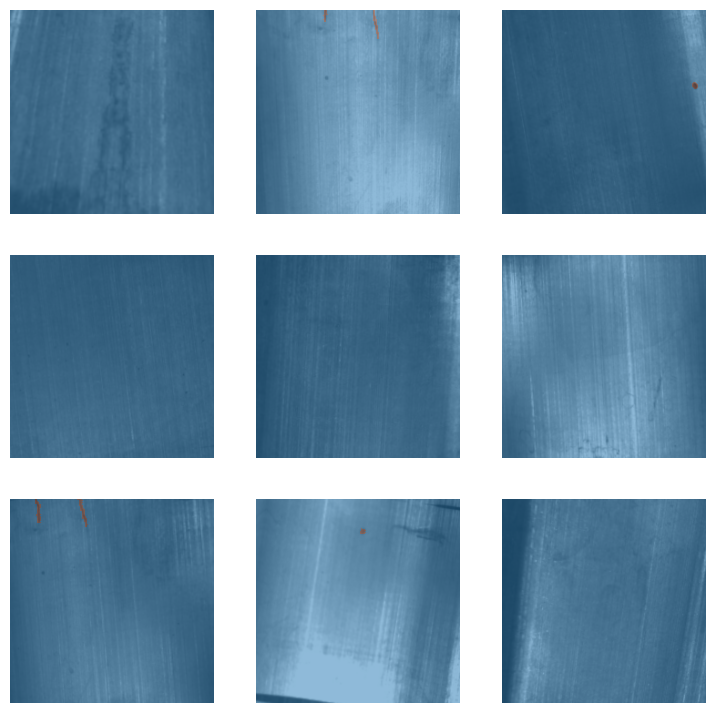

In [22]:
dls = SegmentationDataLoaders.from_label_func(
    path=DATASET_PATH, 
    fnames=train_fpaths + test_fpaths,
    label_func=get_mask_path,
    codes=CODE_NAMES,
    bs=16, 
    splitter=FuncSplitter(lambda o: str(Path(o).parent.name).startswith('test')),
    item_tfms = Resize(item_tfms_sz),
    batch_tfms =[*aug_transforms(size=batch_tfms_sz), 
                 Normalize.from_stats(*imagenet_stats)]
)

#dls.device = 'cpu' # uncomment to use CPU, might take longer to train

dls.show_batch()
batch = dls.one_batch()
print(batch[0].min(), batch[0].max())
print(batch[1].min(), batch[1].max())

In [23]:
len(dls.train_ds), len(dls.valid_ds), len(dls.train_ds) + len(dls.valid_ds)


(314, 78, 392)

In [24]:
metrics = [Dice, JaccardCoeff]  

model_dir = PROJ_PATH/'models'
model_dir.mkdir(exist_ok=True)
model_pickle_fpath = model_dir/'model_pickle_fastai.pkl'
model_pickle_fpath

Path('/models/model_pickle_fastai.pkl')

In [25]:
learn = unet_learner(dls, resnet34, metrics=metrics)
learn.fine_tune(15)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 227MB/s]


epoch,train_loss,valid_loss,dice,jaccard_coeff,time
0,0.485752,0.427232,0.000000,0.000000,00:16


epoch,train_loss,valid_loss,dice,jaccard_coeff,time
0,0.329400,0.267462,0.000000,0.000000,00:12
1,0.312531,0.239722,0.000000,0.000000,00:12
2,0.298849,0.182569,0.512523,0.344559,00:13
3,0.264387,0.178856,0.334464,0.200815,00:12
4,0.228018,0.139719,0.636893,0.467237,00:12
5,0.194344,0.091634,0.752754,0.603533,00:13
6,0.166033,0.074758,0.802598,0.670283,00:14
7,0.143210,0.073790,0.814445,0.686974,00:14
8,0.121040,0.069408,0.812322,0.683958,00:13
9,0.111602,0.062145,0.835418,0.717354,00:13


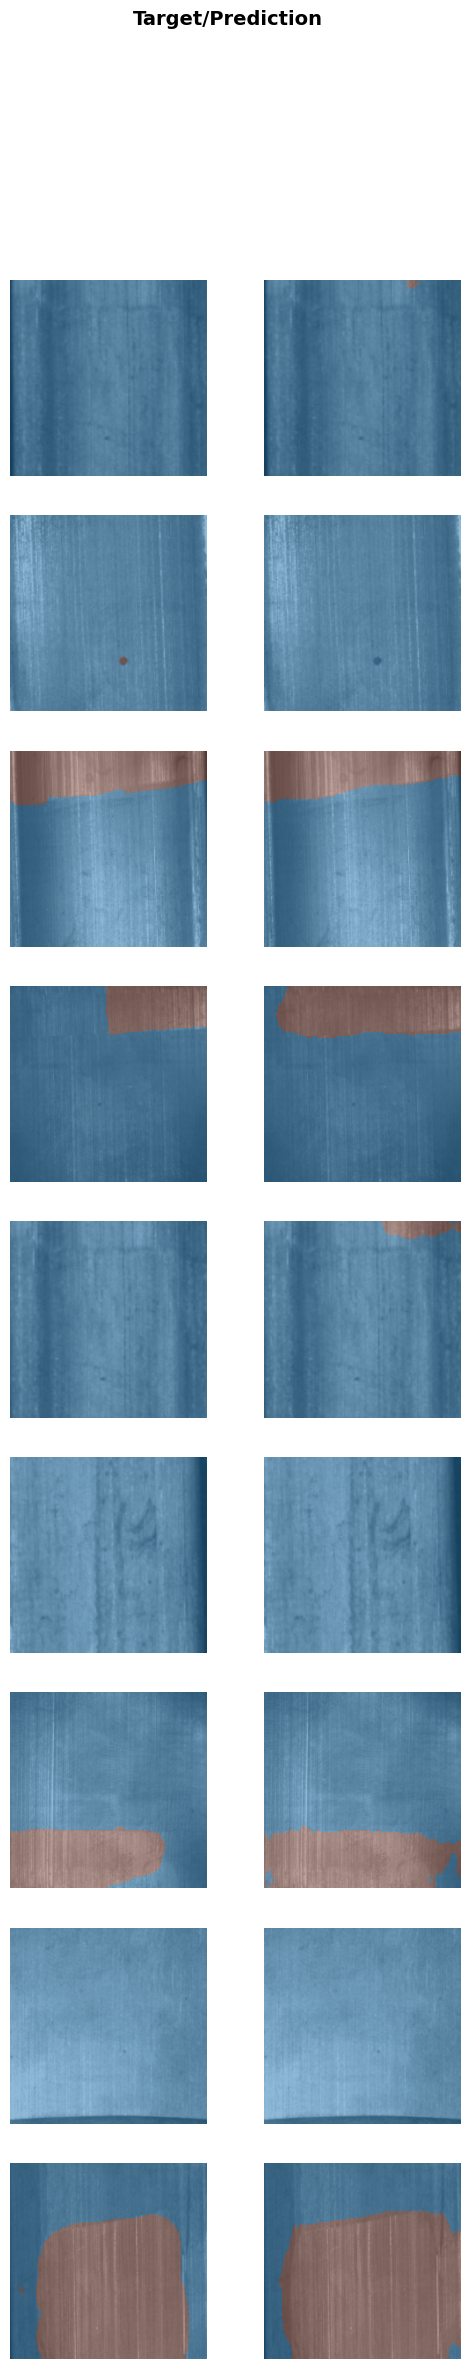

In [26]:
learn.show_results()

In [27]:
loss_val, dice_val, jacc_val = learn.validate()
loss_val, dice_val, jacc_val

(0.05036558955907822, 0.860743712410259, 0.7555312371646288)

In [28]:
import pickle

pickle.dump(learn, open('model_pickle_fastai.pkl', 'wb'))

In [29]:
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm
from fastai.data.all import get_image_files
from fastai.vision.all import load_learner,Image, PILImage

In [30]:
PROJ_PATH = Path.cwd().parent
DATASET_NAME = 'MAGNETIC_TILE_SURFACE_DEFECTS'
DATASET_PATH = PROJ_PATH/'data'/DATASET_NAME

In [33]:
def get_mask_path(img_path): 
    msk_path = Path(str(img_path.parent).replace('_images', '_masks'))/f'{img_path.stem}.png'
    return msk_path
    

learn = pickle.load(open('/content/model_pickle_fastai.pkl', 'rb'))

In [34]:
def dice_coef(y_true, y_pred, eps=0.02):
    intersection = np.sum(y_true * y_pred)
    if (np.mean(y_true)<eps) and (np.mean(y_pred)<eps):
        return 1
    return (2*intersection) / (np.sum(y_true) + np.sum(y_pred))

In [35]:
sz=224

def resize_and_crop_center(im, sz=sz):
    new_shape = (np.array(im.shape)/np.min(im.shape)*sz).astype(int)
    im = im.resize((new_shape[1], new_shape[0]))
    h, w = im.shape
    left = (w - sz)/2
    top = (h - sz)/2
    right = (w + sz)/2
    bottom = (h + sz)/2
    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return im

In [36]:
test_img_path = Path.cwd().parent/'data'/'MAGNETIC_TILE_SURFACE_DEFECTS'/'test_images'
test_mask_path = Path.cwd().parent/'data'/'MAGNETIC_TILE_SURFACE_DEFECTS'/'test_masks'

test_images = get_image_files(test_img_path)

dice_list = []
for img_path in tqdm(test_images):
    mask_path = test_mask_path/f'{img_path.stem}.png'
    im = Image.open(img_path)
    mask_im = Image.open(mask_path)
    im_resized = resize_and_crop_center(im, sz=sz)
    y_true = resize_and_crop_center(mask_im, sz=sz)
    y_true = np.array(y_true)
    y_pred, *_ = learn.predict(PILImage(im_resized))
    y_pred = np.array(y_pred)
    dice = dice_coef(y_true, y_pred)
    dice_list.append(dice)

dice_arr = np.array(dice_list)
dice_arr.mean()

  0%|          | 0/78 [00:00<?, ?it/s]

0.9279948615992512